웹 데이터 추출 및 분석
- 네이버 박스오피스 영화 크롤링 및 분석
=> 박스오피스 흥행순 분석 진행

In [40]:
## 모듈 로딩
from urllib.request import urlopen
from urllib.parse import quote
from bs4 import BeautifulSoup

base='https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&qvt=0&query='
# 링크를 단순 ctrl+c,v를 하면 query 뒤에 암호화가 됨. -> query=~부분을 수정하면 OK
## 그러나 파이썬이 URL 안에 포함된 한글(박스오피스)을 ASCII로 인코딩하지 못해 에러 발생 가능
## -> 한글 URL을 인코딩 해야함

query = quote('박스오피스') # 한글 -> URL
url = base + query
m_url = urlopen(url)
bs=BeautifulSoup(m_url.read(), 'html.parser')

# print(bs)

In [41]:
## 구조 : div class=_panel_populat _tab content
##        ...
##       ul class->panel
##       li
items = bs.select('ul._panel > li')

# print(len(items)) ## 출력가능한지 확인용

## 흥행순 확인
for li in items:
    print(li.text.strip()) ## 텍스트 들고와서 출력

1    위키드: 포 굿 16만명
2    나우 유 씨 미 3 10만명
3    극장판 체인소 맨: 레제편 2.7만명
4    국보 1.4만명
5    프레데터: 죽음의 땅 1만명
6    나혼자 프린스 8,982명
7    퍼스트 라이드 5,451명
8    세계의 주인 5,329명
9    극장판 귀멸의 칼날: 무한성편 5,185명
10    극장판 똘똘이: 아기공룡의 ... 2,631명
11    8번 출구 2,378명
12    코렐라인 2,289명
13    엔드 오브 에반게리온 2,033명
14    가타카 1,808명
15    극장판 주술회전: 회옥·옥절 1,753명
16    포레스텔라 : 더 웨이브 인... 1,434명
17    꼬마돼지 베이브와 타피티 937명
18    부고니아 742명
19    비정성시 689명
20    극장판 노래하는☆왕자님♪ 타... 612명
21    맨홀 553명
22    제이홉 투어 ‘홉 온 더 스... 552명
23    통잠 496명
24    힘 431명
25    너와 나의 5분 422명
26    위키드 411명
27    로보카폴리 사막 구조대 이야기 393명
28    사하라 전차대 352명
29    난징사진관 304명
30    럭키 데이 인 파리 261명
1    극장판 체인소 맨: 레제편 9.27
2    엔드 오브 에반게리온 9.26
3    국보 9.11
4    가타카 9.09
5    세계의 주인 9.08
6    극장판 귀멸의 칼날: 무한성편 9.03
7    제이홉 투어 ‘홉 온 더 스... 8.83
8    비정성시 8.68
9    위키드 8.63
10    프레데터: 죽음의 땅 8.62
11    너와 나의 5분 8.57
12    코렐라인 8.46
13    8번 출구 8.36
14    극장판 똘똘이: 아기공룡의 ... 8.14
15    난징사진관 8.12
16    극장판 주술회전: 회옥·옥절 7.98
17    부고니아 7.90
18    나우 유 씨 미 3 7

In [42]:
titles = []
for li in items:
    title_tag = li.select_one('.name')
    if title_tag:
        titles.append(title_tag.text.strip())
print(titles)
print(len(titles))
print(len(set(titles)))

['위키드: 포 굿', '나우 유 씨 미 3', '극장판 체인소 맨: 레제편', '국보', '프레데터: 죽음의 땅', '나혼자 프린스', '퍼스트 라이드', '세계의 주인', '극장판 귀멸의 칼날: 무한성편', '극장판 똘똘이: 아기공룡의 ...', '8번 출구', '코렐라인', '엔드 오브 에반게리온', '가타카', '극장판 주술회전: 회옥·옥절', '포레스텔라 : 더 웨이브 인...', '꼬마돼지 베이브와 타피티', '부고니아', '비정성시', '극장판 노래하는☆왕자님♪ 타...', '맨홀', '제이홉 투어 ‘홉 온 더 스...', '통잠', '힘', '너와 나의 5분', '위키드', '로보카폴리 사막 구조대 이야기', '사하라 전차대', '난징사진관', '럭키 데이 인 파리', '극장판 체인소 맨: 레제편', '엔드 오브 에반게리온', '국보', '가타카', '세계의 주인', '극장판 귀멸의 칼날: 무한성편', '제이홉 투어 ‘홉 온 더 스...', '비정성시', '위키드', '프레데터: 죽음의 땅', '너와 나의 5분', '코렐라인', '8번 출구', '극장판 똘똘이: 아기공룡의 ...', '난징사진관', '극장판 주술회전: 회옥·옥절', '부고니아', '나우 유 씨 미 3', '퍼스트 라이드', '나혼자 프린스', '위키드: 포 굿', '럭키 데이 인 파리']
52
30


In [43]:
search_urls = []

for title in titles:
    url = base + quote(title)
    search_urls.append(url)

print(search_urls)
print(len(search_urls))

['https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&qvt=0&query=%EC%9C%84%ED%82%A4%EB%93%9C%3A%20%ED%8F%AC%20%EA%B5%BF', 'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&qvt=0&query=%EB%82%98%EC%9A%B0%20%EC%9C%A0%20%EC%94%A8%20%EB%AF%B8%203', 'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&qvt=0&query=%EA%B7%B9%EC%9E%A5%ED%8C%90%20%EC%B2%B4%EC%9D%B8%EC%86%8C%20%EB%A7%A8%3A%20%EB%A0%88%EC%A0%9C%ED%8E%B8', 'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&qvt=0&query=%EA%B5%AD%EB%B3%B4', 'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&qvt=0&query=%ED%94%84%EB%A0%88%EB%8D%B0%ED%84%B0%3A%20%EC%A3%BD%EC%9D%8C%EC%9D%98%20%EB%95%85', 'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&qvt=0&query=%EB%82%98%ED%98%BC%EC%9E%90%20%ED%94%84%EB%A6%B0%EC%8A%A4', 'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&qvt=0&query=%ED%8D%BC%EC%8A%A4%ED%8A%B8%20%EB%9D%BC%EC%9D%B4%EB%93%9C', 'https://sea

In [44]:
import requests
search_results = []   # title → soup 형태로 저장

for title in titles:
    url = base + quote(title)

    res = requests.get(url)
    soup = BeautifulSoup(res.text, "html.parser")

    search_results.append({
        "title": title,
        "soup": soup
    })

print("수집 완료:", len(search_results), "개")

수집 완료: 52 개


In [45]:
movie_data = []

for item in search_results:
    title = item["title"]
    soup = item["soup"]

    box = soup.select_one("span.normal_text")
    info = soup.select_one("div.info_group")

    rank = None
    audience_full = None
    genre = None
    runtime = None
    netizen = None
    audience_score = None


    # 순위 / 누적관객수
    if box:
        full_text = box.text.strip()
        ems = box.select("em")

        if len(ems) >= 2:
            rank = ems[0].text.strip()
            audience_num = ems[1].text.strip()

            idx = full_text.find(audience_num)
            audience_full = full_text[idx:].strip()


    # 장르 / 러닝타임
    if info:
        dd = info.select_one("dd")
        if dd:
            txt = dd.get_text(" ", strip=True)
            parts = txt.split()

            if len(parts) >= 2:
                genre = parts[0]
                runtime = parts[-1]


    # 네티즌 / 실관람객 평점 
    score_boxes = soup.select("div.item_area")

    for sb in score_boxes:
        title_tag = sb.select_one("strong.item_title")
        score_tag = sb.select_one("span.this_text_bold")

        if title_tag and score_tag:
            name = title_tag.text.strip()
            score = score_tag.text.strip()

            if name == "네티즌 평점":
                netizen = score
            
            if name == "실관람객 평점":
                audience_score = score


    movie_data.append({
        "title": title,
        "rank": rank,
        "audience": audience_full,
        "genre": genre,
        "runtime": runtime,
        "netizen": netizen,
        "audience_score": audience_score,
    })


for d in movie_data[:5]:
    print(d)


{'title': '위키드: 포 굿', 'rank': '1', 'audience': '40만명', 'genre': '판타지', 'runtime': '137분', 'netizen': '6.75', 'audience_score': '7.54'}
{'title': '나우 유 씨 미 3', 'rank': '2', 'audience': '92만명', 'genre': '범죄', 'runtime': '112분', 'netizen': '7.18', 'audience_score': '7.83'}
{'title': '극장판 체인소 맨: 레제편', 'rank': '3', 'audience': '325만명', 'genre': '애니메이션', 'runtime': '100분', 'netizen': '9.36', 'audience_score': '9.27'}
{'title': '국보', 'rank': '4', 'audience': '4.5만명', 'genre': '드라마', 'runtime': '175분', 'netizen': '9.46', 'audience_score': '9.11'}
{'title': '프레데터: 죽음의 땅', 'rank': '5', 'audience': '40만명', 'genre': 'SF', 'runtime': '107분', 'netizen': '9.12', 'audience_score': '8.62'}


In [46]:
import pandas as pd

df = pd.DataFrame(movie_data)
df

,title,rank,audience,genre,runtime,netizen,audience_score
0,위키드: 포 굿,1,40만명,판타지,137분,6.75,7.54
1,나우 유 씨 미 3,2,92만명,범죄,112분,7.18,7.83
2,극장판 체인소 맨: 레제편,3,325만명,애니메이션,100분,9.36,9.27
3,국보,4,4.5만명,드라마,175분,9.46,9.11
4,프레데터: 죽음의 땅,5,40만명,SF,107분,9.12,8.62
5,나혼자 프린스,6,2.8만명,코미디,116분,7.32,7.54
6,퍼스트 라이드,7,72만명,코미디,116분,5.53,7.57
7,세계의 주인,8,12만명,드라마,119분,9.21,9.08
8,극장판 귀멸의 칼날: 무한성편,9,564만명,애니메이션,155분,9.14,9.03
9,극장판 똘똘이: 아기공룡의 ...,None,None,None,None,None,None


In [47]:
## 중복 데이터 존재 (->title확인:수집부터 중복)
df = df.drop_duplicates(subset=["title"], keep="first")
df

,title,rank,audience,genre,runtime,netizen,audience_score
0,위키드: 포 굿,1,40만명,판타지,137분,6.75,7.54
1,나우 유 씨 미 3,2,92만명,범죄,112분,7.18,7.83
2,극장판 체인소 맨: 레제편,3,325만명,애니메이션,100분,9.36,9.27
3,국보,4,4.5만명,드라마,175분,9.46,9.11
4,프레데터: 죽음의 땅,5,40만명,SF,107분,9.12,8.62
5,나혼자 프린스,6,2.8만명,코미디,116분,7.32,7.54
6,퍼스트 라이드,7,72만명,코미디,116분,5.53,7.57
7,세계의 주인,8,12만명,드라마,119분,9.21,9.08
8,극장판 귀멸의 칼날: 무한성편,9,564만명,애니메이션,155분,9.14,9.03
9,극장판 똘똘이: 아기공룡의 ...,None,None,None,None,None,None


In [48]:
import re
import numpy as np

def convert_audience(x):
    if x is None or x is np.nan:
        return np.nan
    
    x = x.replace(",", "")
    
    # 만명 케이스
    if "만명" in x:
        num = float(re.sub("[^0-9.]", "", x))
        return int(num * 10000)
    
    # 명 케이스
    if "명" in x:
        num = float(re.sub("[^0-9.]", "", x))
        return int(num)
    
    return np.nan

In [49]:
# df.info()
## 타입 변경
df['rank'] = pd.to_numeric(df['rank'], errors='coerce')
df['netizen'] = pd.to_numeric(df['netizen'], errors='coerce')
df['audience_score'] = pd.to_numeric(df['audience_score'], errors='coerce')
# runtime은 모두 '분'
df['runtime'] = (
    df['runtime']
    .str.replace('분', '')
    .astype(float)
)

df['audience_num'] = df['audience'].apply(convert_audience)
df['audience_num'].head()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           30 non-null     object 
 1   rank            22 non-null     float64
 2   audience        22 non-null     object 
 3   genre           26 non-null     object 
 4   runtime         26 non-null     float64
 5   netizen         22 non-null     float64
 6   audience_score  20 non-null     float64
 7   audience_num    22 non-null     float64
dtypes: float64(5), object(3)
memory usage: 2.1+ KB


C:\Users\shp67\AppData\Local\Temp\ipykernel_20044\2898856466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rank'] = pd.to_numeric(df['rank'], errors='coerce')
C:\Users\shp67\AppData\Local\Temp\ipykernel_20044\2898856466.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['netizen'] = pd.to_numeric(df['netizen'], errors='coerce')
C:\Users\shp67\AppData\Local\Temp\ipykernel_20044\2898856466.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,title,rank,audience,genre,runtime,netizen,audience_score,audience_num
0,위키드: 포 굿,1.0,40만명,판타지,137.0,6.75,7.54,400000.0
1,나우 유 씨 미 3,2.0,92만명,범죄,112.0,7.18,7.83,920000.0
2,극장판 체인소 맨: 레제편,3.0,325만명,애니메이션,100.0,9.36,9.27,3250000.0
3,국보,4.0,4.5만명,드라마,175.0,9.46,9.11,45000.0
4,프레데터: 죽음의 땅,5.0,40만명,SF,107.0,9.12,8.62,400000.0
5,나혼자 프린스,6.0,2.8만명,코미디,116.0,7.32,7.54,28000.0
6,퍼스트 라이드,7.0,72만명,코미디,116.0,5.53,7.57,720000.0
7,세계의 주인,8.0,12만명,드라마,119.0,9.21,9.08,120000.0
8,극장판 귀멸의 칼날: 무한성편,9.0,564만명,애니메이션,155.0,9.14,9.03,5640000.0
9,극장판 똘똘이: 아기공룡의 ...,NaN,None,None,NaN,NaN,NaN,NaN


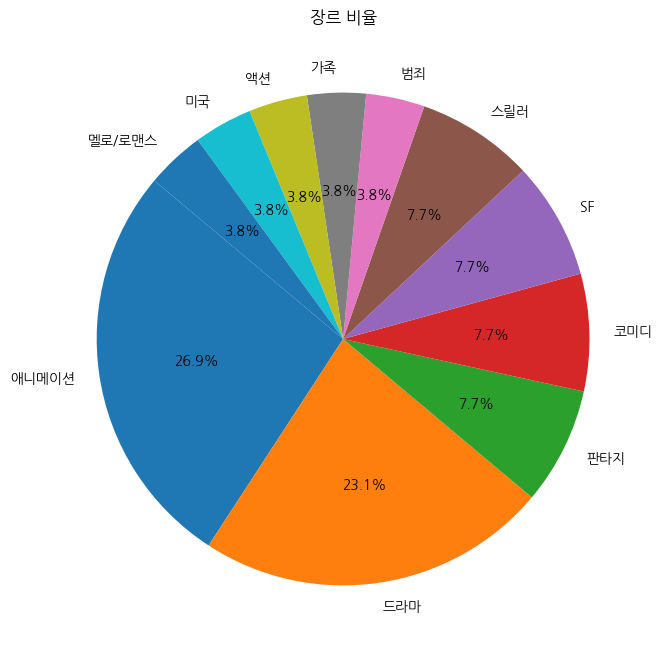

In [52]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 장르별 개수 계산
genre_counts = df['genre'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    genre_counts,
    labels=genre_counts.index,
    autopct='%.1f%%',
    startangle=140
)

plt.title('장르 비율')
plt.show()


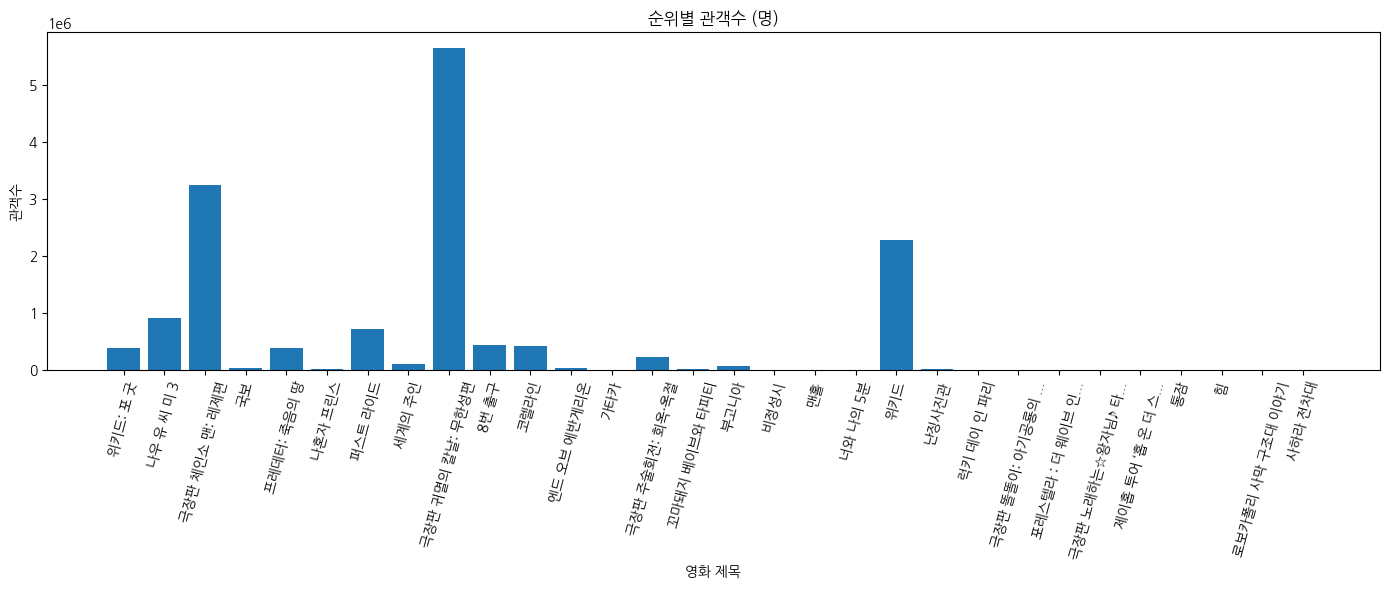

In [57]:
df_sorted = df.sort_values('rank')

plt.figure(figsize=(14,6))
plt.bar(df_sorted['title'], df_sorted['audience_num_fill'])

plt.xticks(rotation=75)
plt.title('순위별 관객수 (명)')
plt.ylabel('관객수')
plt.xlabel('영화 제목')

plt.tight_layout()
plt.show()

C:\Users\shp67\AppData\Local\Temp\ipykernel_20044\3006385254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['netizen_fill'] = df['netizen'].fillna(0)
C:\Users\shp67\AppData\Local\Temp\ipykernel_20044\3006385254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['audience_score_fill'] = df['audience_score'].fillna(0)


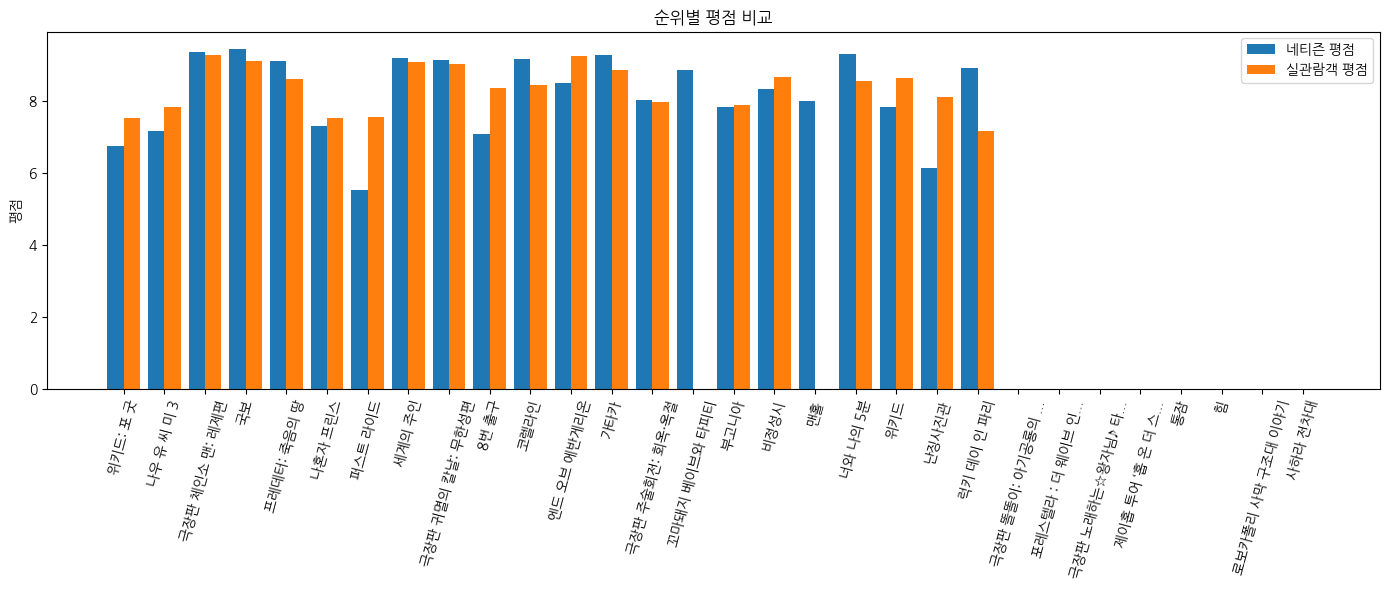

In [58]:
df['netizen_fill'] = df['netizen'].fillna(0)
df['audience_score_fill'] = df['audience_score'].fillna(0)

x = np.arange(len(df_sorted))

plt.figure(figsize=(14,6))

plt.bar(x - 0.2, df_sorted['netizen_fill'], width=0.4, label="네티즌 평점")
plt.bar(x + 0.2, df_sorted['audience_score_fill'], width=0.4, label="실관람객 평점")

plt.xticks(x, df_sorted['title'], rotation=75)
plt.ylabel("평점")
plt.title("순위별 평점 비교")
plt.legend()

plt.tight_layout()
plt.show()

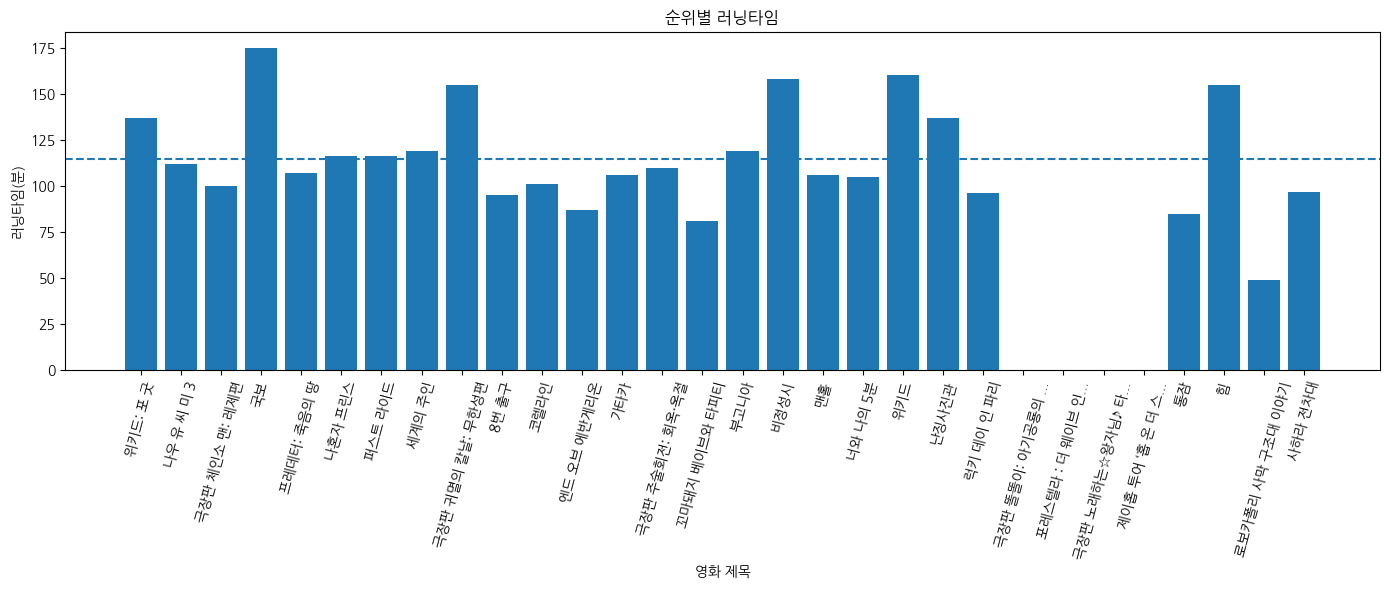

In [60]:
avg_runtime = df['runtime'].mean()

plt.figure(figsize=(14,6))

plt.bar(df_sorted['title'], df_sorted['runtime'])

# 평균선
plt.axhline(avg_runtime, linestyle='--')

plt.title("순위별 러닝타임")
plt.xlabel("영화 제목")
plt.ylabel("러닝타임(분)")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()